<a href="https://colab.research.google.com/github/mirsazzathossain/CSE317-Lab/blob/autumn_2022/Lab_Assignment_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### **Polynomial Regression**

In this assignment, you will implement polynomial regression and apply it to the [Assignment 4 Dataset](https://minhaskamal.github.io/DownGit/#/home?url=https://github.com/mirsazzathossain/CSE317-Lab-Numerical-Methods/blob/main/datasets/data.csv).

The dataset contains two columns, the first column is the feature and the second column is the label. The goal is find the best fit line for the data.

You will need to perform the following regression tasks and find the best one for the dataset.

1.    **Linear Regression:**

     The equation we are trying to fit is:
     $$y = \theta_0 + \theta_1 x$$
     where $x$ is the feature and $y$ is the label.

     We can rewrite the equation in vector form as:
$$Y = X\theta$$ where $X$ is a matrix with two columns, the first column is all 1s and the second column is the feature, and $Y$ is a vector with the labels. $\theta$ is a vector with two elements, $\theta_0$ and $\theta_1$. The $X$ matrix will look like this:
$$X = \begin{bmatrix} 1 & x_1 \\ 1 & x_2 \\ \vdots & \vdots \\ 1 & x_n \end{bmatrix}$$
2. **Quadratic Regression:**

     The equation we are trying to fit is:
     $$y = \theta_0 + \theta_1 x + \theta_2 x^2$$
     where $x$ is the feature and $y$ is the label.

     We can rewrite the equation in vector form as:
$$Y = X\theta$$where $X$ is a matrix with three columns, the first column is all 1s, the second column is the feature, and the third column is the feature squared, and $Y$ is a vector with the labels. $\theta$ is a vector with three elements, $\theta_0$, $\theta_1$, and $\theta_2$. The $X$ matrix will look like this:

$$X = \begin{bmatrix} 1 & x_1 & x_1^2 \\ 1 & x_2 & x_2^2 \\ \vdots & \vdots & \vdots \\ 1 & x_n & x_n^2 \end{bmatrix}$$
3. **Cubic Regression:**

     The equation we are trying to fit is:
$$y = \theta_0 + \theta_1 x + \theta_2 x^2 + \theta_3 x^3$$
     where $x$ is the feature and $y$ is the label.

     We can rewrite the equation in vector form as:
$$Y = X\theta$$where $X$ is a matrix with four columns, the first column is all 1s, the second column is the feature, the third column is the feature squared, and the fourth column is the feature cubed, and $Y$ is a vector with the labels. $\theta$ is a vector with four elements, $\theta_0$, $\theta_1$, $\theta_2$, and $\theta_3$. The $X$ matrix will look like this:
$$X = \begin{bmatrix} 1 & x_1 & x_1^2 & x_1^3 \\ 1 & x_2 & x_2^2 & x_2^3 \\ \vdots & \vdots & \vdots & \vdots \\ 1 & x_n & x_n^2 & x_n^3 \end{bmatrix}$$

Take 15 data points from the dataset and use them as the training set. Use the remaining data points as the test set. For each regression task, find the best $\theta$ vector using the training set. Then, calculate the mean squared error (MSE) on the test set. Plot the training set, the test set (in a different color), and the best fit line for each regression task. Which regression task gives the best fit line? Which regression task gives the lowest MSE on the test set? Report your answers in a Markdown cell.

**Note:** Do not use any built-in functions like `np.polyfit` or `sklearn.linear_model.LinearRegression` or any other built-in functions that perform polynomial regression. You must implement the regression tasks yourself.

In [1]:
from google.colab import drive
drive.mount('/content/drive')
data_path = '/content/drive/MyDrive/Faiaz/data.csv'

Mounted at /content/drive


Degree 1 Polynomial Regression:
  Theta: [-16.2578       9.28842016]
  Test MSE: 196.64818147337405


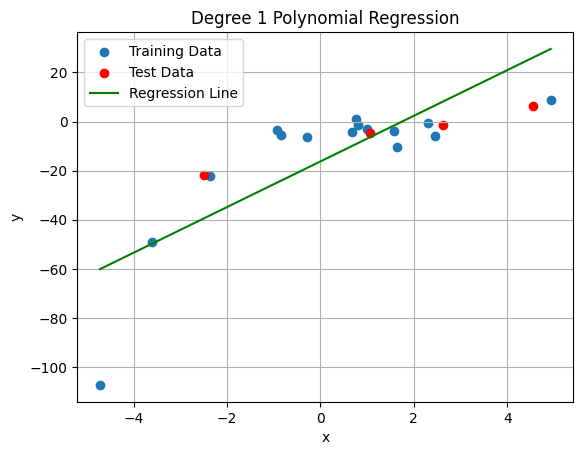

Degree 2 Polynomial Regression:
  Theta: [-5.93904384  8.69360943 -1.77579633]
  Test MSE: 112.07532476906108


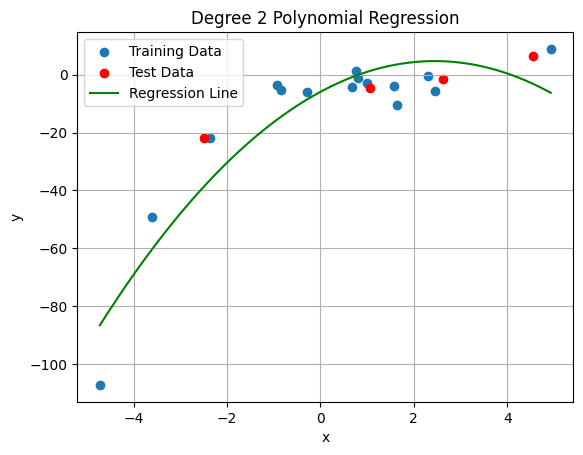

Degree 3 Polynomial Regression:
  Theta: [-1.81475935  0.3872521  -2.11449796  0.50922389]
  Test MSE: 8.07247882377012


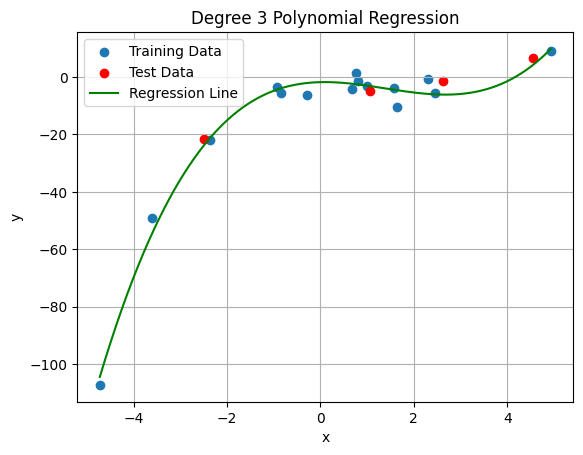

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
data = np.loadtxt(data_path, delimiter=',', skiprows=1)

# Extract features and labels
x = data[:, 0]
y = data[:, 1]

# Split the data into training and testing sets
x_train = x[:15]
y_train = y[:15]

x_test = x[15:]
y_test = y[15:]

def create_polynomial_features(x, degree):
    """Creates polynomial features up to the given degree."""
    x_poly = np.zeros((len(x), degree + 1))
    for i in range(degree + 1):
        x_poly[:, i] = x ** i
    return x_poly

def polynomial_regression(x, y, degree):
    """Performs polynomial regression and returns the theta vector."""
    X = create_polynomial_features(x, degree)
    theta = np.linalg.solve(X.T @ X, X.T @ y)  # Normal equation
    return theta

def predict(x, theta):
    """Predicts y values using the given theta vector and polynomial features."""
    degree = len(theta) - 1
    X = create_polynomial_features(x, degree)
    y_pred = X @ theta
    return y_pred

def calculate_mse(y_true, y_pred):
    """Calculates the Mean Squared Error."""
    return np.mean((y_true - y_pred) ** 2)

# Perform polynomial regression for degrees 1, 2, and 3
degrees = [1, 2, 3]
for degree in degrees:
    theta = polynomial_regression(x_train, y_train, degree)
    y_pred_train = predict(x_train, theta)
    y_pred_test = predict(x_test, theta)
    mse_test = calculate_mse(y_test, y_pred_test)

    # Print results
    print(f"Degree {degree} Polynomial Regression:")
    print(f"  Theta: {theta}")
    print(f"  Test MSE: {mse_test}")

    # Plot results
    plt.figure()
    plt.scatter(x_train, y_train, label="Training Data")
    plt.scatter(x_test, y_test, label="Test Data", color="red")
    x_line = np.linspace(min(x), max(x), 1000)
    plt.plot(x_line, predict(x_line, theta), label="Regression Line", color="green")
    plt.title(f"Degree {degree} Polynomial Regression")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.grid(True)
    plt.legend()
    plt.show()